In [1]:
import os
import sys

import pandas as pd
import numpy as np
import typing

sys.path.append(os.path.abspath("../common"))  # add path to common functions
from preprocess import getdfs, process_strings, get_char_columns

In [2]:
train_df, valid_df = getdfs('text_seq')

In [3]:
train_df['input_str'] = process_strings(train_df['input_str'].values)
valid_df['input_str'] = process_strings(valid_df['input_str'].values)

In [4]:
num_feat = 15

def get_columns (df) :
    for i in range(num_feat):
        df[f'c_{i}'] = df['input_str'].apply(lambda x : x[i])
    return df.drop(columns = ['input_str'])

train_df = get_columns(train_df)
valid_df = get_columns(valid_df)

## One Hot Encoding

In [5]:
# Feature engineering (example: one-hot encoding)
from sklearn.preprocessing import OneHotEncoder
from preprocess import one_hot_encode

train_df, valid_df, y_train, y_valid = one_hot_encode(train_df, valid_df)

In [6]:
y_valid.shape

(489,)

In [7]:
x_train = train_df.values
x_valid = valid_df.values

In [8]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions
import matplotlib.pyplot as plt

Best Parameters: {'colsample_bytree': 0.7, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 500, 'subsample': 1.0}
Best Score: 0.8453389830508474
==========XGBoost Tuned==========
              precision    recall  f1-score   support

     Class 0       0.89      0.85      0.87       252
     Class 1       0.85      0.89      0.87       237

    accuracy                           0.87       489
   macro avg       0.87      0.87      0.87       489
weighted avg       0.87      0.87      0.87       489

Accuracy is 0.869120654396728
==========XGBoost Tuned==========


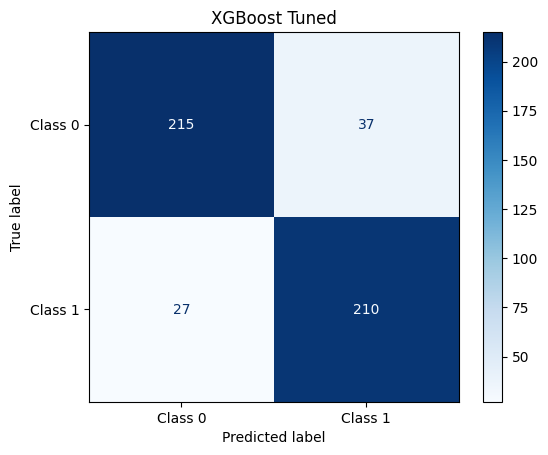

In [9]:
y_pred_xgboost = predict_xgboost(x_train, y_train, x_valid, grid_search=True)

evaluate_predictions(y_valid, y_pred_xgboost, 'XGBoost Tuned')